In [1]:
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
import matplotlib.pyplot as plt

In [2]:
# Function to generate a random binary string using quantum circuits
def RandomString(str_len):
    op_str = ''  # Initialize an empty output string
    num_qbits = 5  # Define number of qubits

    # Calculate the number of chunks needed
    num_chunks = math.ceil(str_len / num_qbits)
    for _ in range(num_chunks):
        # Create a quantum register and a classical register
        q = QuantumRegister(num_qbits)
        c = ClassicalRegister(num_qbits)
        QC = QuantumCircuit(q, c)

        # Apply Hadamard gates to all qubits to create superposition
        for i in range(num_qbits):
            QC.h(q[i])
        QC.measure(q, c)

        simulator = AerSimulator()
        # Measure the qubits
        circ = transpile(QC, simulator)
        result = simulator.run(circ, shots=1, memory=True).result()
        memory = result.get_memory(circ)
        op_str += memory[0]  # Append the measured result to op_str

    return op_str[:str_len]  # Return the full random string

In [11]:
# Displaying the message
message = input('Enter a short message (default message is "Hello World"): ')
if len(message) < 1:
    message = 'Hello'
print('Message to be sent:', message)

# Define key length (for demo, use a shorter length)
len_message = len(message) * 3
print("Length of the encryption key: ", len_message)

# Step 1: Generate Alice's key and bases
alice_key = RandomString(len_message)
alice_bases = RandomString(len_message)
print('Alice Key:', alice_key)
print('Alice Bases:', alice_bases)

Enter a short message (default message is "Hello World"):  


Message to be sent: Hello
Length of the encryption key:  15
Alice Key: 010110001010111
Alice Bases: 100000001001010


In [12]:
# Quantum Circuit for encoding
q = QuantumRegister(len_message)
c = ClassicalRegister(len_message)
qc = QuantumCircuit(q, c)

# Encode qubits based on Alice's key and basis
for i in range(len_message):
    if alice_key[i] == '1':
        qc.x(q[i])  # Flip the qubit to 1 if key is 1
    if alice_bases[i] == '1':
        qc.h(q[i])  # Apply Hadamard gate if basis is 1
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=15, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q23'), 0), Qubit(QuantumRegister(15, 'q23'), 1), Qubit(QuantumRegister(15, 'q23'), 2), Qubit(QuantumRegister(15, 'q23'), 3), Qubit(QuantumRegister(15, 'q23'), 4), Qubit(QuantumRegister(15, 'q23'), 5), Qubit(QuantumRegister(15, 'q23'), 6), Qubit(QuantumRegister(15, 'q23'), 7), Qubit(QuantumRegister(15, 'q23'), 8), Qubit(QuantumRegister(15, 'q23'), 9), Qubit(QuantumRegister(15, 'q23'), 10), Qubit(QuantumRegister(15, 'q23'), 11), Qubit(QuantumRegister(15, 'q23'), 12), Qubit(QuantumRegister(15, 'q23'), 13), Qubit(QuantumRegister(15, 'q23'), 14)), clbits=())

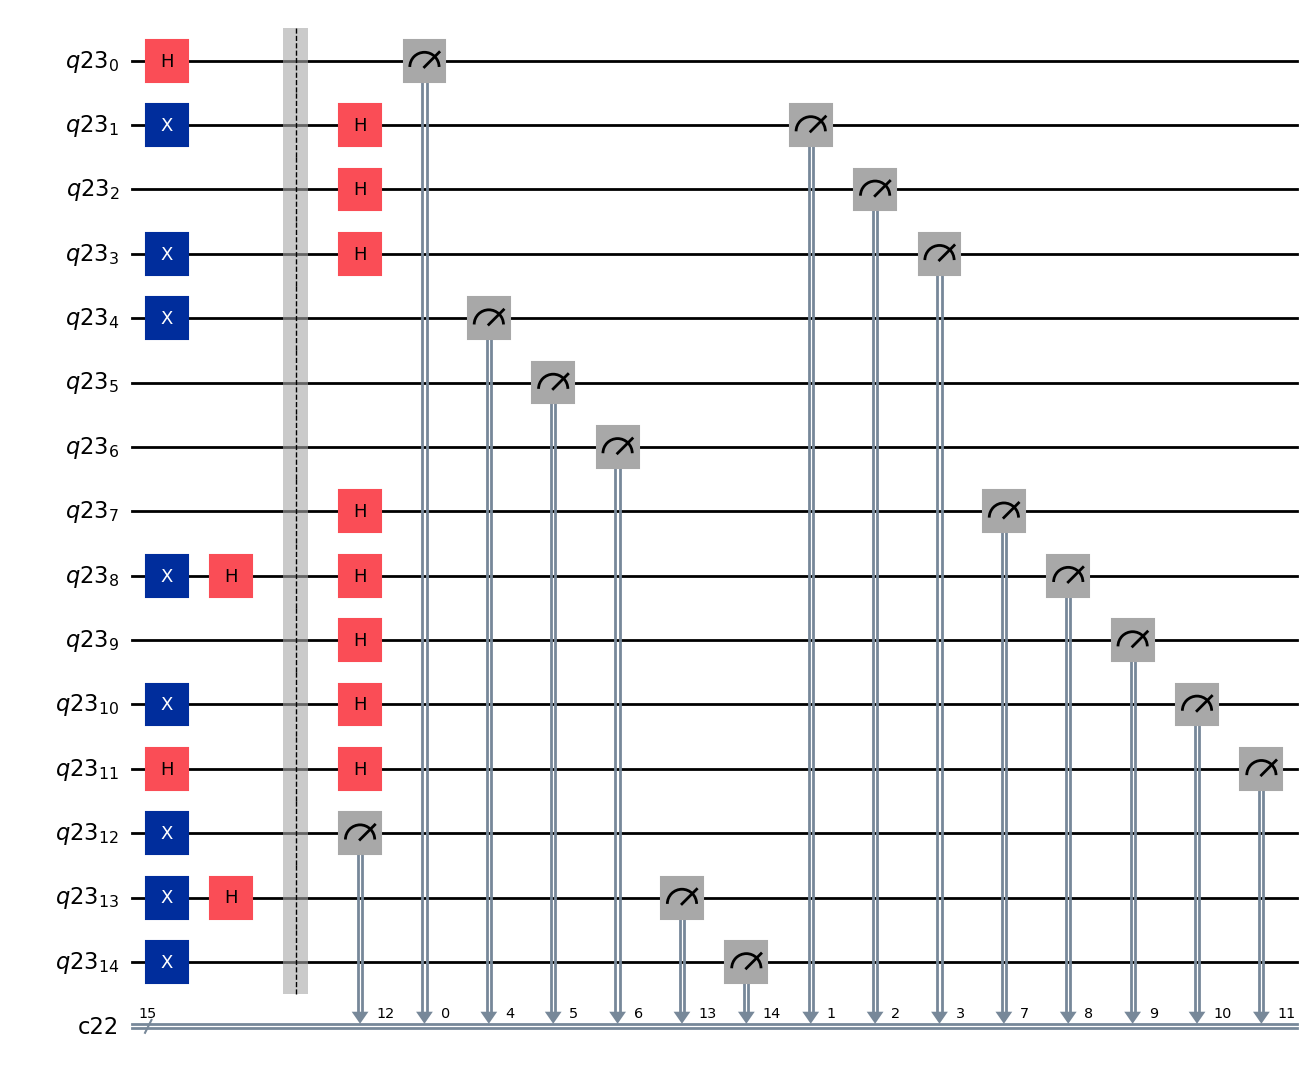

In [16]:
qc.draw('mpl')

In [14]:
# Step 2: Bob's random basis selection
bob_bases = RandomString(len_message)  # Bob generates random bases
print('Bob Bases: ', bob_bases)

# Step 3: Bob measures the qubits
for i in range(len_message):
    if bob_bases[i] == '1':
        qc.h(q[i])  # Bob applies Hadamard if measuring in Hadamard basis

# Add measurements
qc.measure(q, c)

Bob Bases:  011100011111000


In [15]:
# Run the circuit
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ, shots=1, memory=True).result()
bob_result = result.get_memory(circ)
print('Bob Measurement Result:', bob_result[0])

# Display matching bits for shared key
shared_key = []
for i in range(len_message):
    if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
        shared_key.append(bob_result[0][len_message - i - 1])  # Reverse order in Qiskit

final_shared_key = ''.join(shared_key)
print('Final Shared Key:', final_shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100
print("Percentage of key bits retained: ", percentage_retained, "%")

Bob Measurement Result: 111000110010001
Final Shared Key: 1001011
Percentage of key bits retained:  46.666666666666664 %


### Check

In [21]:
# Generate Alice's key and bases
alice_key = RandomString(len_message)
alice_bases = RandomString(len_message)

# Generate Bob's random bases
bob_bases = RandomString(len_message)

# Calculate the final shared key
shared_key = []
for i in range(len_message):
    if alice_bases[i] == bob_bases[i]:  # Only keep the bit if bases match
        shared_key.append(bob_result[0][len_message - i - 1])  # Reverse order in Qiskit
final_shared_key = ''.join(shared_key)

# Calculate the percentage of key bits retained
matching_bits_count = len(final_shared_key)
percentage_retained = (matching_bits_count / len_message) * 100

# Print the results
print("Alice's Key: ", alice_key)
print("Alice's Bases: ", alice_bases)
print("Bob's Bases: ", bob_bases)
print("Final Shared Key: ", final_shared_key)
print("Percentage of Key Bits Retained: ", percentage_retained, "%")


Alice's Key:  111101010101011
Alice's Bases:  111101000000111
Bob's Bases:  110000101001001
Final Shared Key:  1011001
Percentage of Key Bits Retained:  46.666666666666664 %


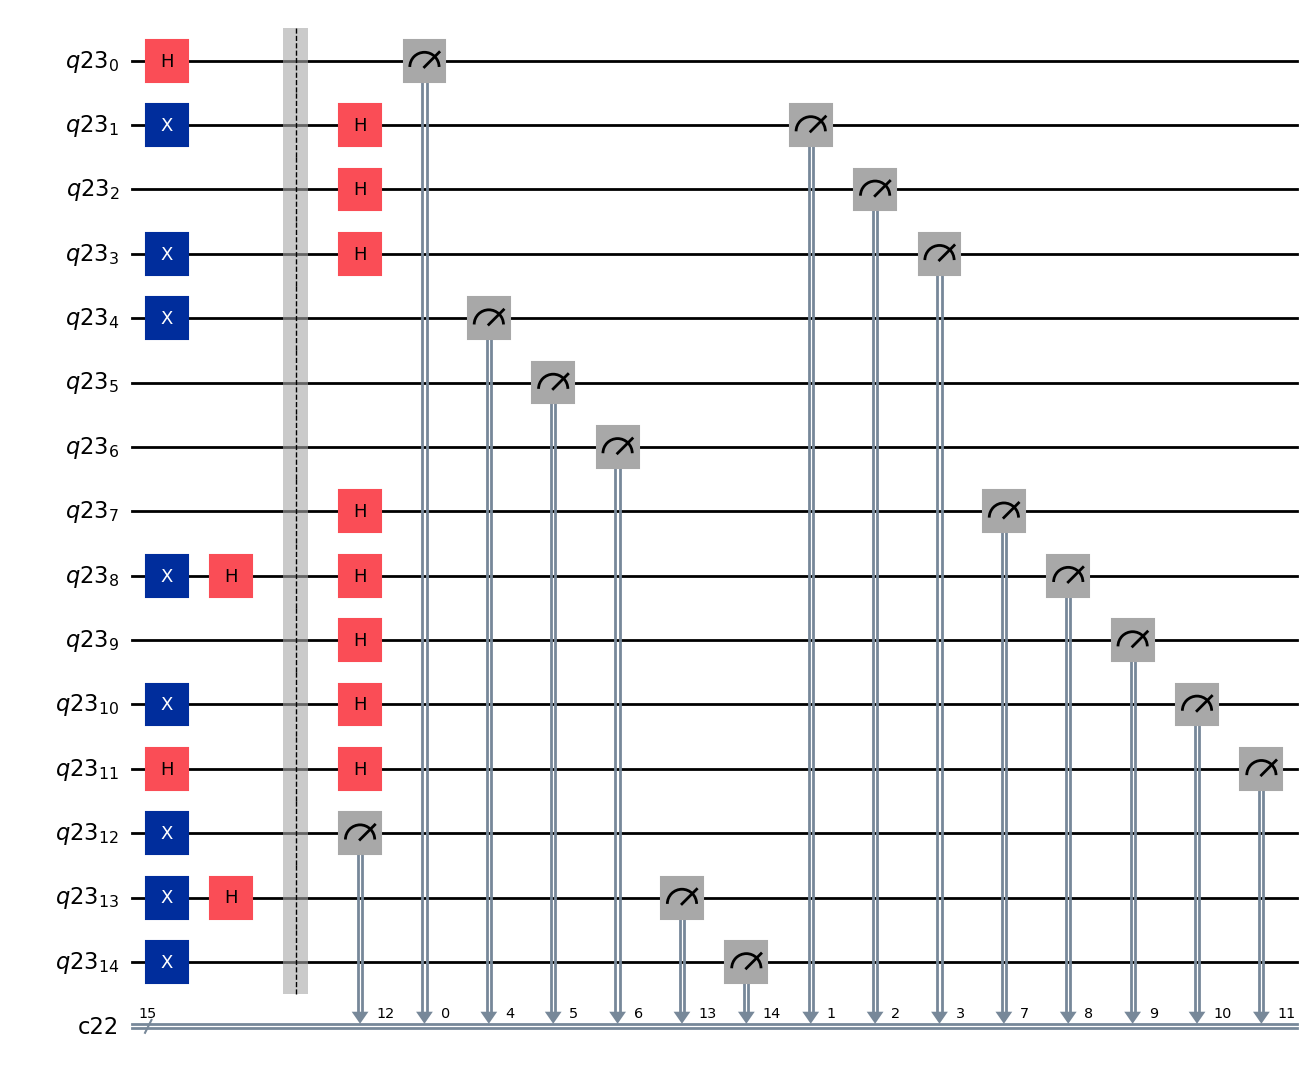

In [20]:
qc.draw('mpl')